In [28]:
#import nltk
#nltk.download()

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk #natural language tool kit
import re  # regular expression library
import requests #library to work with URLs

Natural language processing is text Data. 
Text data is unsupervised learning data and sources of text data are documents(pdf, word, excel,text), databases, social media, IOT devices, etc.

Text data is large data and requires preprocessing for bringing to a structure where algorithms can be build.

Preprocessing involves tasks like removing punctuations, digits, special characters, hyperlinks, emojis, stop words(is,a,an,the,etc),etc.

Post preprocessing text must me tocanized into either sentences or words.NLP is all about words or tokens.

Conversion of text into matrx of numbers like documnet term matrix, term frequency, inverse documnet frequency matrix or word embedding.

Models can be build- supervised Leraning(regression or classification)
                    -unsupervised learning(clustering or topic modelling) or transfomer models(encoder-decoder models) or recurrent neural networks(LSTM or GRU)

## -------------------WEB SCRAPING----------------------
#### Web Scraping is scraping content like text from html, webpages. Opensource wen pages can be scraped

In [30]:
Climatewiki=requests.get("https://en.wikipedia.org/wiki/Climate_change")

In [31]:
from bs4 import BeautifulSoup
climatedf=BeautifulSoup(Climatewiki.content,"lxml")

In [32]:
climatetxt=climatedf.getText(strip=True)

In [33]:
print(climatetxt)

Climate change - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usContributeHelpLearn to editCommunity portalRecent changesUpload fileSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonateCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide(Top)1Terminology2Global temperature riseToggle Global temperature rise subsection2.1Temperatures prior to present-day global warming2.2Warming since the Industrial Revolution2.2.1Differences by region2.3Future global temperatures3Causes of recent global temperature riseToggle Causes of recent global temperature rise subsection3.1Greenhouse gases3.2Land surface changes3.3Other factors3.3.1Aerosols and clouds3.3.2Solar and volcanic activity3.3.3Climate change feedbacks4Modelling5ImpactsToggle Impacts subsection5.1Environmental effects5.2Tipping points and long-term impacts5.3Nature and wildlife5.4H

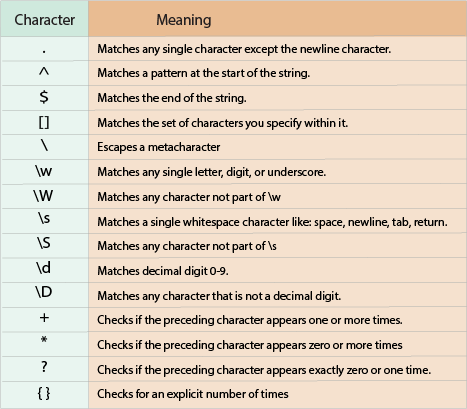

In [34]:
#replace digits in [] or [23] with space
climatetxt=re.sub(r'\[\d+\]'," ",climatetxt)

#re.sub(pattern to be replaced, pattern replacement)," " indicates space

In [35]:
climatetxt=re.sub(r'\[\w+\]'," ",climatetxt)

In [36]:
climatetxt=re.sub(r'\(\w+\)'," ",climatetxt)

In [37]:
climatetxt=re.sub(r'[0-9]+'," ",climatetxt) #Remove digits 

In [38]:
climatetxt=re.sub("\xa0°C"," ",climatetxt) 

In [39]:
climatetxt

'Climate change - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usContributeHelpLearn to editCommunity portalRecent changesUpload fileSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonateCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide  Terminology Global temperature riseToggle Global temperature rise subsection . Temperatures prior to present-day global warming . Warming since the Industrial Revolution . . Differences by region . Future global temperatures Causes of recent global temperature riseToggle Causes of recent global temperature rise subsection . Greenhouse gases . Land surface changes . Other factors . . Aerosols and clouds . . Solar and volcanic activity . . Climate change feedbacks Modelling ImpactsToggle Impacts subsection . Environmental effects . Tipping points and long-term impacts . Nature and wildlife . Huma

#### Tokenzation - Breaking content into sentences or words
#### Sentences Tokenzation -Breaking content into sentences delimiter is fullstop
#### Word Tokenzation - Breaking content into words deliniter is space

In [40]:
from nltk.tokenize import sent_tokenize

In [41]:
climatesentences= sent_tokenize(climatetxt) #breaking into sentnces
climatesentences=pd.DataFrame(climatesentences,columns=['sentence'])

#### Text Blob based sentiment analysis.TextBlob Library has sentiment function that calculates 2 scores-polarity and subjectvity.
#### Polarity score lies between -1 to 1. Polarity score is used for sentiment analysis. Polarity score is calculated by comparing with list or lexicon of positive and neutral words.

#### Subjectivity Score lies between 0 and 1. Close to 1 indicates high personal option and close to 0 indicates low personal opinion

In [42]:
pip show textblob

Note: you may need to restart the kernel to use updated packages.


In [43]:
from textblob import TextBlob

ModuleNotFoundError: No module named 'textblob'

In [30]:
s1.TextBlob("tendulkar is greater batsman in cricket")
s1.sentiment

NameError: name 's1' is not defined

In [ ]:
def analyze_sentiment(text):
    analysis=TextBlob(text)
    if analysis.sentiment.polarity>0:
        return "Positive"
    elif analysis.sentiment.polarity==0:
        return "Neutral"
    else:
        return "Negative"

# Pending 

In [18]:
#NLP core format is words/tokenize
from nltk.tokenize import word_tokenize

In [19]:
climatewords=word_tokenize(climatetxt) # break content into words/tokens

In [20]:
climatewords=[w.lower() for w in climatewords] #convert to lower case or small caps

In [21]:
climatewords=[w for w in climatewords if w.isalnum()] #selects only alphabets

In [22]:
from nltk.corpus import stopwords

In [23]:
english_stopwords=set(stopwords.words("english")) #stopwords are is, are, a , the ,it, to, etc.

In [25]:
climatewords=[w for w in climatewords if not w in english_stopwords] #remove stopwords

In [26]:
climatewords=[w for w in climatewords if len(w)>2] #select words with more than 2 characters

In [27]:
from nltk.probability import FreqDist
wordfreq=FreqDist(climatewords)
wordfreq.most_common(20)

[('climate', 463),
 ('change', 305),
 ('global', 194),
 ('warming', 175),
 ('2019', 104),
 ('emissions', 86),
 ('carbon', 85),
 ('energy', 76),
 ('greenhouse', 75),
 ('temperature', 64),
 ('summary', 61),
 ('original', 58),
 ('2018', 57),
 ('2021', 57),
 ('ar6', 56),
 ('impacts', 51),
 ('earth', 51),
 ('surface', 50),
 ('heat', 49),
 ('2022', 49)]

## ---------Forming word cloud -----------

In [44]:
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'